<a name='a'></a>
# header

* Name : **MOHAMMAD IQBAL**
* Matric No. : MCDS221035

## Content

1. [check raw data](#raw_data)
2. [clean data](#data_cleaning)
    * data type
    * duplicated
    * null values
3. [feature engineering](#fe)
    * create transaction id (considering transaction at the same day is one transaction)
    * form daily quantity sale
4. [EDA](#eda)
5. [Data preparation](#prep)
6. [association rule mining](#apriori)
    * scenario 1
    * scenario 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px

In [3]:
df = pd.read_csv('Dataset_B.csv')

<a name='raw_data'></a>
[to header](#a)
## 1. chek raw data

In [4]:
df

,Member_number,Date,itemDescription
0,3562,18-03-2015,salty snack
1,3145,16-11-2015,cake bar
2,3595,17-12-2015,whole milk
3,4934,17-03-2015,other vegetables
4,3386,03-02-2015,yogurt
...,...,...,...
19410,4471,08-10-2014,sliced cheese
19411,2022,23-02-2014,candy
19412,1097,16-04-2014,cake bar
19413,1510,03-12-2014,fruit/vegetable juice


In [5]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    19415 non-null  int64 
 1   Date             19415 non-null  object
 2   itemDescription  19415 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.2+ KB


<a name='data_cleaning'></a>
[to header](#a)
## 2. data cleaning

In [6]:
print(f'null value : \n{df.isnull().sum()}')

null value : 
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [7]:
df.duplicated().sum()

165

In [8]:
df[df.duplicated()]
# decide to do nothing towards duplicated

,Member_number,Date,itemDescription
1813,2338,08-12-2015,curd
1866,3821,03-01-2015,herbs
4438,1225,26-02-2015,whole milk
4572,2210,09-07-2015,whole milk
4592,2448,08-06-2015,root vegetables
...,...,...,...
19251,2364,23-07-2014,bottled water
19264,2027,26-02-2014,domestic eggs
19334,2936,07-03-2014,newspapers
19335,2311,13-03-2014,pot plants


### date type

In [9]:
# change the dete data type into date time
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    19415 non-null  int64         
 1   Date             19415 non-null  datetime64[ns]
 2   itemDescription  19415 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 455.2+ KB


### sort by date and member
assume that one day is one transaction for each customer. one day is one basket for each customer

In [11]:
# sort the data so that it'll arranged by date and customer
df.sort_values(by=['Date','Member_number'], inplace=True)

In [12]:
df

,Member_number,Date,itemDescription
6864,1249,2014-01-01,coffee
12137,1381,2014-01-01,soda
7933,1440,2014-01-01,yogurt
12334,1659,2014-01-01,frozen vegetables
9543,1789,2014-01-01,candles
...,...,...,...
4095,3562,2015-12-30,shopping bags
15610,3562,2015-12-30,rolls/buns
1472,3579,2015-12-30,herbs
5024,3579,2015-12-30,oil


In [13]:
df.reset_index(inplace=True)

<a name='fe'></a>
[to header](#a)
## 3. feature engineering

### generate transaction id

In [14]:
df

,index,Member_number,Date,itemDescription
0,6864,1249,2014-01-01,coffee
1,12137,1381,2014-01-01,soda
2,7933,1440,2014-01-01,yogurt
3,12334,1659,2014-01-01,frozen vegetables
4,9543,1789,2014-01-01,candles
...,...,...,...,...
19410,4095,3562,2015-12-30,shopping bags
19411,15610,3562,2015-12-30,rolls/buns
19412,1472,3579,2015-12-30,herbs
19413,5024,3579,2015-12-30,oil


Generating transaction id is by assumption that :
* the transaction that done in the same day assumed as one transaction
* the transaction by the same member_number in the same day is considered as one basket/one transaction

After we have sorted data by date and member_number and index reseted we can easily identified one basket or one transaction. By **observing weather the recods and previous records is not in the same day, and weather the records and previous records done by the different member_number**. 
* If satisfying that condition, mean that it is different basket, then transaction_id will increase 
* if not, it means that it is in the one basket so the transaction_id will be the same eith previous records

In [15]:
trans_id = []
count = 1
for i in range(len(df)):
    if i == 0 or (df['Member_number'].loc[i] != df['Member_number'].loc[i-1]) or (df['Date'].loc[i] != df['Date'].loc[i-1]):
        count += 1
        trans_id.append(count)
    else :
        trans_id.append(count)

In [16]:
len(trans_id)

19415

In [17]:
df.shape

(19415, 4)

In [18]:
df['transaction_id'] = trans_id

In [19]:
df

,index,Member_number,Date,itemDescription,transaction_id
0,6864,1249,2014-01-01,coffee,2
1,12137,1381,2014-01-01,soda,3
2,7933,1440,2014-01-01,yogurt,4
3,12334,1659,2014-01-01,frozen vegetables,5
4,9543,1789,2014-01-01,candles,6
...,...,...,...,...,...
19410,4095,3562,2015-12-30,shopping bags,12757
19411,15610,3562,2015-12-30,rolls/buns,12757
19412,1472,3579,2015-12-30,herbs,12758
19413,5024,3579,2015-12-30,oil,12758


In [20]:
# total basket/transaction
df['transaction_id'].nunique()

12758

In [21]:
# a = df.groupby(['Date','Member_number'])['itemDescription'].apply(list).reset_index()
# a.shape

<a name='eda'></a>
[to header](#a)
## 4. Exploratory data analysis

In [22]:
df['itemDescription'].value_counts().head(10)

itemDescription
whole milk            957
rolls/buns            901
soda                  863
yogurt                774
other vegetables      752
shopping bags         607
bottled water         559
pastry                485
whipped/sour cream    440
newspapers            434
Name: count, dtype: int64

In [23]:
# product item sold distribution
df['itemDescription'].value_counts().describe()

count    164.000000
mean     118.384146
std      175.703857
min        1.000000
25%       19.000000
50%       51.000000
75%      131.250000
max      957.000000
Name: count, dtype: float64

In [24]:
print(f'number of product : {df["itemDescription"].nunique()} products')
print(f"number of member : {df['Member_number'].nunique()} members")
print(f"number of day recorded : {df['Date'].nunique()} days")
print(f"number of basket/transaction : {df['transaction_id'].nunique()} transactions")

number of product : 164 products
number of member : 3814 members
number of day recorded : 728 days
number of basket/transaction : 12758 transactions


In [25]:
daily_itemsold = df.groupby('Date').agg({'itemDescription':'count'}).reset_index()

In [26]:
print(f"maximum daily item sold : {daily_itemsold['itemDescription'].max()}")
print(f"minimum daily item sold : {daily_itemsold['itemDescription'].min()}")
print(f"average daily item sold : {round(daily_itemsold['itemDescription'].mean(),2)}")

maximum daily item sold : 54
minimum daily item sold : 7
average daily item sold : 26.67


In [27]:
no_of_buy = df.groupby('Member_number').agg({'transaction_id':'count'}).reset_index()

In [28]:
print(f"maximum transaction per member {no_of_buy['transaction_id'].max()}")
print(f"minimum transaction per member {no_of_buy['transaction_id'].min()}")
print(f"average transaction per member {round(no_of_buy['transaction_id'].mean(),2)}")

maximum transaction per member 19
minimum transaction per member 1
average transaction per member 5.09


In [29]:
size_of_basket = df.groupby('transaction_id').agg({'itemDescription':'count'}).reset_index()

In [30]:
print(f"maximum item in basket {size_of_basket['itemDescription'].max()}")
print(f"minimum item in basket {size_of_basket['itemDescription'].min()}")
print(f"average item in basket {round(size_of_basket['itemDescription'].mean(),2)}")

maximum item in basket 5
minimum item in basket 1
average item in basket 1.52


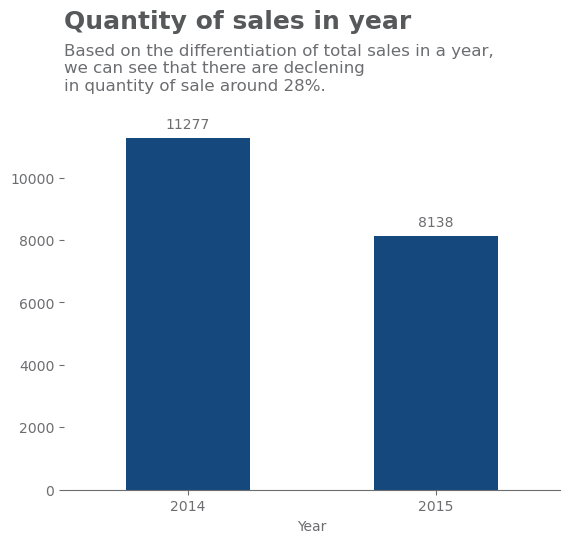

In [31]:
yearly_sale = df.groupby(df['Date'].dt.year).agg({'itemDescription':'count'})
ax = yearly_sale.plot.bar(legend=False, color='#15497e')
plt.title('Quantity of sales in year\n\n\n', loc='left', fontsize=18, fontweight='bold', color='#57585a')
plt.text(-.5, 13500, 'Based on the differentiation of total sales in a year,\nwe can see that there are declening \nin quantity of sale around 28%.',ha='left', va='center', fontsize=12, color='#6c6d70')
plt.xticks(rotation=0)
plt.xlabel('Year', color='#6c6d70')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()+200), ha='center', va='bottom', color='#6c6d70')

    # visual component
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('#6c6d70')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

In [32]:
sales_count = df.groupby(df['Date'].dt.date).agg({'itemDescription':'count'}).reset_index()

In [33]:
sales_count['Date'] = pd.to_datetime(sales_count['Date'])

In [34]:
sales_count_2014 = sales_count[sales_count['Date'] < '2015-01-01']
sales_count_2015 = sales_count[sales_count['Date'] >= '2015-01-01']
sales_count_2014_quarter = sales_count_2014.groupby(sales_count['Date'].dt.quarter).agg({'itemDescription':'mean'})
sales_count_2015_quarter = sales_count_2015.groupby(sales_count['Date'].dt.quarter).agg({'itemDescription':'mean'})

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1421: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:831: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:691: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


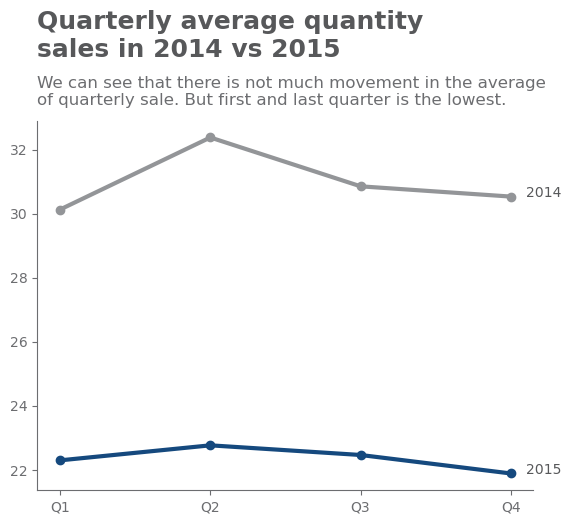

In [35]:
plt.plot(sales_count_2014_quarter.index,sales_count_2014_quarter['itemDescription'],linewidth=3, color='#939598',marker='o')
plt.plot(sales_count_2015_quarter.index,sales_count_2015_quarter['itemDescription'],linewidth=3,color='#15497e',marker='o')
plt.title('Quarterly average quantity\nsales in 2014 vs 2015\n\n', loc='left', fontsize=18, fontweight='bold', color='#57585a')
plt.text(.85, 33.8, 'We can see that there is not much movement in the average\nof quarterly sale. But first and last quarter is the lowest.',ha='left', va='center', fontsize=12, color='#6c6d70')
plt.xticks(range(1,5),['Q1','Q2','Q3','Q4'])
plt.annotate('2014', xy=(4, sales_count_2014_quarter.iloc[-1]), xytext=(4.1, sales_count_2014_quarter.iloc[-1]), color='#57585a')
plt.annotate('2015', xy=(4, sales_count_2015_quarter.iloc[-1]), xytext=(4.1, sales_count_2015_quarter.iloc[-1]), color='#57585a')

# visual component
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('#6c6d70')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

In [36]:
sales_count_2014_month = sales_count_2014.groupby(sales_count_2014['Date'].dt.month).agg({'itemDescription':'mean'})
sales_count_2015_month = sales_count_2015.groupby(sales_count_2015['Date'].dt.month).agg({'itemDescription':'mean'})

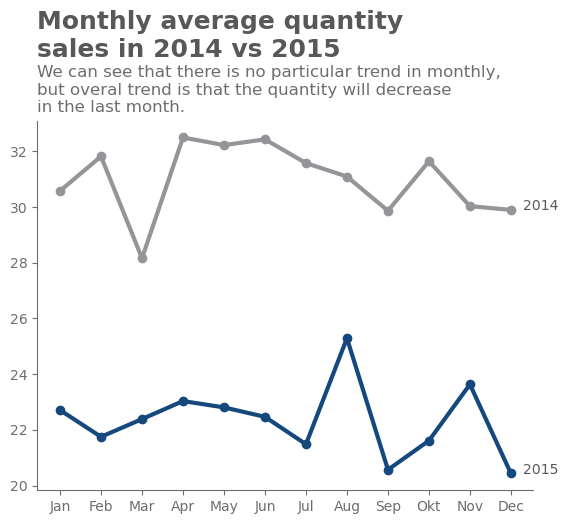

In [37]:
plt.plot(sales_count_2014_month.index,sales_count_2014_month['itemDescription'],linewidth=3, color='#939598',marker='o')
plt.plot(sales_count_2015_month.index,sales_count_2015_month['itemDescription'],linewidth=3,color='#15497e',marker='o')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec'])
# plt.legend(['2014','2015'])
plt.title('Monthly average quantity\nsales in 2014 vs 2015\n\n',loc='left', fontsize=18, fontweight='bold', color='#57585a')
plt.text(.45, 34.2, 'We can see that there is no particular trend in monthly,\nbut overal trend is that the quantity will decrease\nin the last month.',ha='left', va='center', fontsize=12, color='#6c6d70')
plt.annotate('2014', xy=(12, sales_count_2014_month.iloc[-1]), xytext=(12.3, sales_count_2014_month.iloc[-1]),color='#57585a')
plt.annotate('2015', xy=(12, sales_count_2015_month.iloc[-1]), xytext=(12.3, sales_count_2015_month.iloc[-1]),color='#57585a')


# visual component
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('#6c6d70')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

In [38]:
sales_count_2014_dm = sales_count_2014.groupby(sales_count_2014['Date'].dt.day).agg({'itemDescription':'mean'})
sales_count_2015_dm = sales_count_2015.groupby(sales_count_2015['Date'].dt.day).agg({'itemDescription':'mean'})

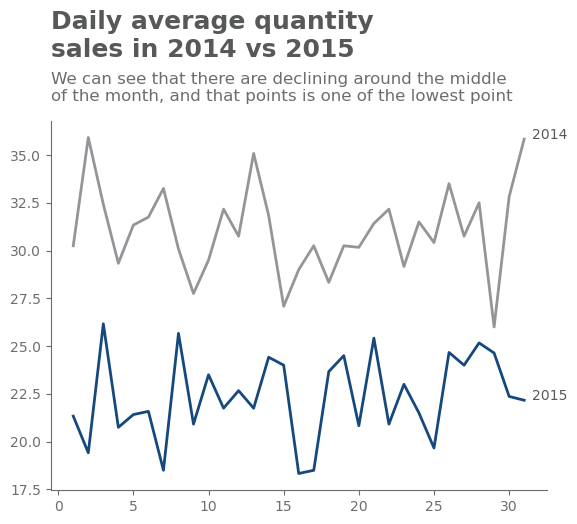

In [39]:
plt.plot(sales_count_2014_dm.index,sales_count_2014_dm['itemDescription'],linewidth=2, color='#939598')
plt.plot(sales_count_2015_dm.index,sales_count_2015_dm['itemDescription'],linewidth=2,color='#15497e')
plt.title('Daily average quantity\nsales in 2014 vs 2015\n\n',loc='left', fontsize=18, fontweight='bold', color='#57585a')
plt.text(-.5, 38.5, 'We can see that there are declining around the middle\nof the month, and that points is one of the lowest point',ha='left', va='center', fontsize=12, color='#6c6d70')
plt.annotate('2014', xy=(30, sales_count_2014_dm.iloc[-1]), xytext=(31.5, sales_count_2014_dm.iloc[-1]),color='#57585a')
plt.annotate('2015', xy=(30, sales_count_2015_dm.iloc[-1]), xytext=(31.5, sales_count_2015_dm.iloc[-1]),color='#57585a')

# visual component
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('#6c6d70')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

In [40]:
sales_count_2014_weekly = sales_count_2014.groupby(sales_count_2014['Date'].dt.dayofweek).agg({'itemDescription':'mean'})
sales_count_2015_weekly = sales_count_2015.groupby(sales_count_2015['Date'].dt.dayofweek).agg({'itemDescription':'mean'})

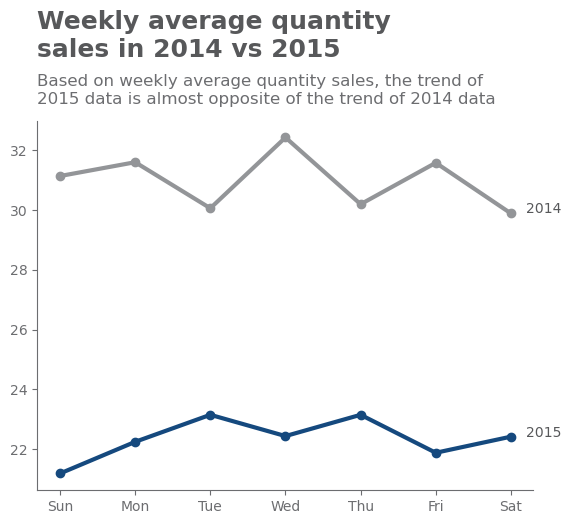

In [41]:
plt.plot(sales_count_2014_weekly.index,sales_count_2014_weekly['itemDescription'],linewidth=3, color='#939598',marker='o')
plt.plot(sales_count_2015_weekly.index,sales_count_2015_weekly['itemDescription'],linewidth=3,color='#15497e',marker='o')
plt.xticks(range(0,7),['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.title('Weekly average quantity\nsales in 2014 vs 2015\n\n',loc='left', fontsize=18, fontweight='bold', color='#57585a')
plt.text(-.3, 34, 'Based on weekly average quantity sales, the trend of \n2015 data is almost opposite of the trend of 2014 data',ha='left', va='center', fontsize=12, color='#6c6d70')
plt.annotate('2014', xy=(6, sales_count_2014_weekly.iloc[-1]), xytext=(6.2, sales_count_2014_weekly.iloc[-1]),color='#57585a')
plt.annotate('2015', xy=(6, sales_count_2015_weekly.iloc[-1]), xytext=(6.2, sales_count_2015_weekly.iloc[-1]),color='#57585a')

# visual component
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('#6c6d70')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

In [42]:
sales_count

,Date,itemDescription
0,2014-01-01,27
1,2014-01-02,35
2,2014-01-03,26
3,2014-01-04,24
4,2014-01-05,36
...,...,...
723,2015-12-26,12
724,2015-12-27,37
725,2015-12-28,25
726,2015-12-29,20


In [43]:
sales_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             728 non-null    datetime64[ns]
 1   itemDescription  728 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [44]:
rolling = sales_count['itemDescription'].rolling(30).mean()

Text(0.5, 1.0, 'Daily quantity sale and its rolling mean\n')

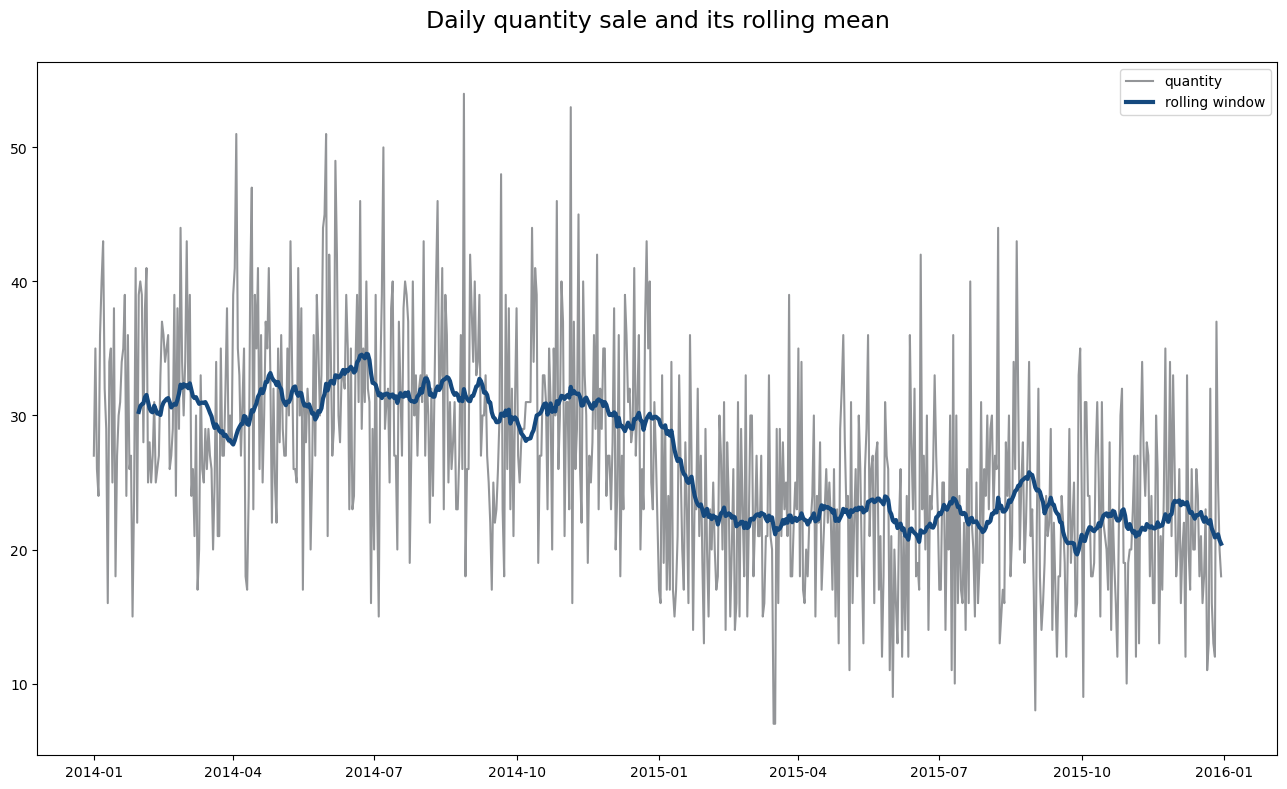

In [45]:
plt.figure(figsize=(16,9))
plt.plot(sales_count['Date'],sales_count['itemDescription'], color='#939598')
plt.plot(sales_count['Date'],rolling,color='#15497e',linewidth=3)
plt.legend(['quantity','rolling window'])
# plt.axvline('2014-04-01',color='red')
# plt.axvline('2014-07-1',color='red')
# plt.axvline('2014-10-1',color='red')
# plt.axvline('2015-01-1',color='red')
# plt.axvline('2015-04-1',color='red')
# plt.axvline('2015-07-1',color='red')
# plt.axvline('2015-10-1',color='red')
plt.title('Daily quantity sale and its rolling mean\n', fontsize=17)

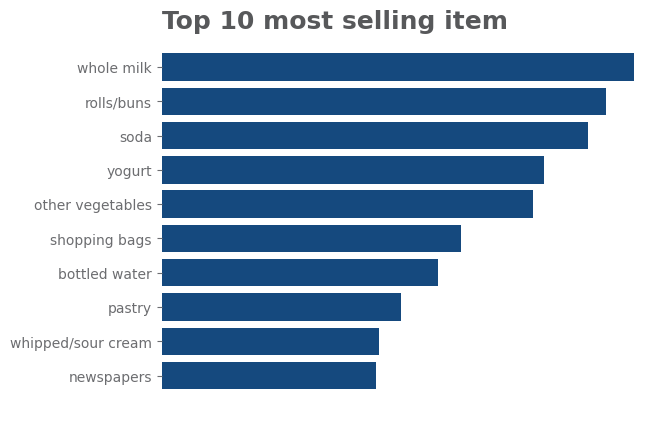

In [46]:
top10 = df['itemDescription'].value_counts().head(10).sort_values(ascending=True)

fig, ax1 = plt.subplots()
ax1.barh(top10.index,top10, color='#15497e')
ax1.set_title('Top 10 most selling item', color='#57585a', loc='left', fontweight='bold', fontsize='18')
ax1.spines['right'].set_color('none')  
ax1.spines['left'].set_color('none')  
ax1.spines['top'].set_color('none')  
ax1.spines['bottom'].set_color('none') 
plt.tick_params(axis='both', colors='#6c6d70')
plt.xticks([])
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 20, p.get_y() + p.get_height() / 2.), va='center', color='#6c6d70')


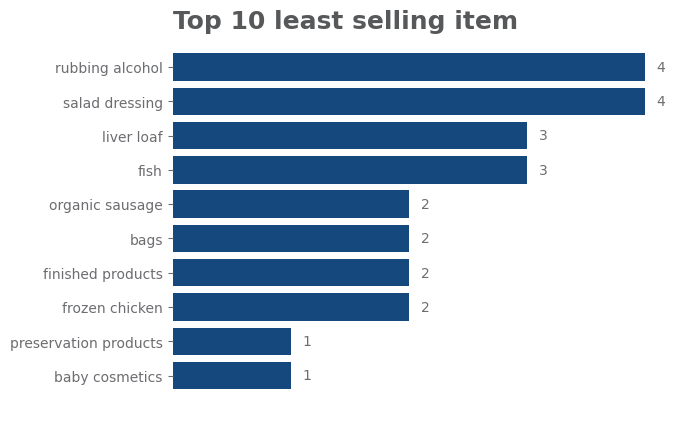

In [47]:
top10 = df['itemDescription'].value_counts().tail(10).sort_values(ascending=True)

fig, ax = plt.subplots()
ax.barh(top10.index,top10, color='#15497e')
ax.set_title('Top 10 least selling item', color='#57585a', loc='left', fontweight='bold', fontsize='18')
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('none')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('none') 
plt.tick_params(axis='both', colors='#6c6d70')
plt.xticks([])
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2.), va='center', color='#6c6d70')


<a name='prep'></a>
[to header](#a)
## 5. Data preparatoin
group by transaction/basket

In [48]:
df_ap = df.groupby(['transaction_id','Date'])['itemDescription'].apply(list).reset_index()
df_ap

,transaction_id,Date,itemDescription
0,2,2014-01-01,[coffee]
1,3,2014-01-01,[soda]
2,4,2014-01-01,[yogurt]
3,5,2014-01-01,[frozen vegetables]
4,6,2014-01-01,[candles]
...,...,...,...
12753,12755,2015-12-30,"[rubbing alcohol, domestic eggs, whole milk]"
12754,12756,2015-12-30,[chocolate marshmallow]
12755,12757,2015-12-30,"[shopping bags, rolls/buns]"
12756,12758,2015-12-30,"[herbs, oil]"


In [49]:
# df_ap = df.groupby(['Date','Member_number'])['itemDescription'].apply(list).reset_index()

### additional eda

In [50]:
df_ap['b_size'] = df_ap['itemDescription'].apply(len)

In [51]:
df_ap

,transaction_id,Date,itemDescription,b_size
0,2,2014-01-01,[coffee],1
1,3,2014-01-01,[soda],1
2,4,2014-01-01,[yogurt],1
3,5,2014-01-01,[frozen vegetables],1
4,6,2014-01-01,[candles],1
...,...,...,...,...
12753,12755,2015-12-30,"[rubbing alcohol, domestic eggs, whole milk]",3
12754,12756,2015-12-30,[chocolate marshmallow],1
12755,12757,2015-12-30,"[shopping bags, rolls/buns]",2
12756,12758,2015-12-30,"[herbs, oil]",2


In [52]:
df_daily_trans = df_ap.groupby('Date').agg({'b_size': 'count'})

In [53]:
print(f'maximum daily transaction {df_daily_trans.b_size.max()}')
print(f'minimum daily transaction {df_daily_trans.b_size.min()}')
print(f'average daily transaction {round(df_daily_trans.b_size.mean(),2)}')

maximum daily transaction 39
minimum daily transaction 5
average daily transaction 17.52


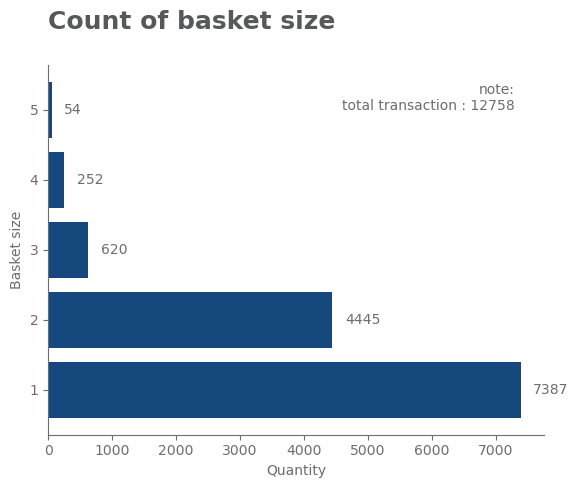

In [54]:
df_ap_numbasket = df_ap['b_size'].value_counts()
fig, ax = plt.subplots()
ax.barh(df_ap_numbasket.index,df_ap_numbasket, color='#15497e')
ax.set_title('Count of basket size\n', color='#57585a', loc='left', fontweight='bold', fontsize='18')
# ax.annotate('test', xy=(4000,3), xytext=(4000,3))
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('#6c6d70')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')
ax.set_ylabel('Basket size', color='#6c6d70')
ax.set_xlabel('Quantity', color='#6c6d70')
ax.annotate(f'note:\ntotal transaction : {len(df_ap)}',xy=(7300,5),ha='right', color='#6c6d70')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 200, p.get_y() + p.get_height() / 2.), va='center', color='#6c6d70')


<a name='apriori'></a>
[to header](#a)
## 6. Association rule mining using A-priori

### scenario 1
In the first scenario, dataset that will be used is the entire dataset as mentioned in 
previous sub-section. After dataset is preprocessed, the apriori will be done using 
mlxtend library. As mentioned above, for initial minimum support, I will use the least
support of the item list using by dividing least product occurrence by total transaction.


In [55]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

encoding

In [56]:
te = TransactionEncoder()
te_ap = te.fit_transform(df_ap['itemDescription'])

In [57]:
te_ap.shape

(12758, 164)

In [58]:
data = pd.DataFrame(te_ap, columns = te.columns_)

In [59]:
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df['itemDescription'].value_counts().quantile(.01)

1.6300000000000001

In [61]:
1.6/len(data)

0.0001254115065057219

In [62]:
df['itemDescription'].value_counts().describe()

count    164.000000
mean     118.384146
std      175.703857
min        1.000000
25%       19.000000
50%       51.000000
75%      131.250000
max      957.000000
Name: count, dtype: float64

In [63]:
df['itemDescription'].value_counts().median()

51.0

<AxesSubplot:xlabel='itemDescription'>

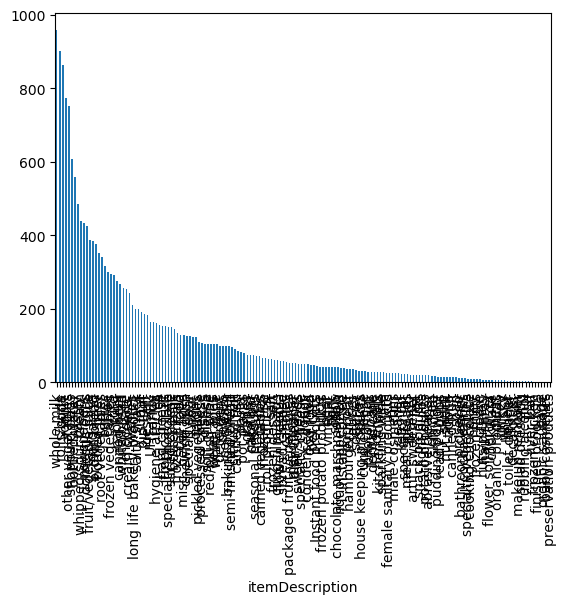

In [65]:
df['itemDescription'].value_counts().plot.bar()

In [63]:
# determine min_support
df['itemDescription'].value_counts().min()/len(data)

7.838219156607619e-05

In [64]:
frq_itmset = apriori(data, min_support=.00008, use_colnames=True)
frq_itmset.sort_values(by='support', ascending=False)

,support,itemsets
159,0.073679,(whole milk)
118,0.068976,(rolls/buns)
133,0.066625,(soda)
160,0.059962,(yogurt)
99,0.058708,(other vegetables)
...,...,...
1185,0.000157,"(specialty cheese, long life bakery product)"
1186,0.000157,"(sweet spreads, long life bakery product)"
610,0.000157,"(whole milk, canned vegetables)"
1188,0.000157,"(waffles, long life bakery product)"


In [65]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
# pd.reset_option('all')

In [66]:
frq_itmset['length'] = frq_itmset['itemsets'].apply(len)

In [67]:
frq_itmset.groupby('length')['support'].describe()

,count,mean,std,min,25%,50%,75%,max
length,,,,,,,,
1,162.0,0.009313,0.013610,0.000157,0.001509,0.003997,0.010484,0.073679
2,1463.0,0.000340,0.000301,0.000157,0.000157,0.000235,0.000392,0.002587
3,59.0,0.000162,0.000020,0.000157,0.000157,0.000157,0.000157,0.000235


In [68]:
# pareto
frq_itmset['support'].quantile(.5)

0.00023514657469822856

In [69]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frq_itmset, metric="support", min_threshold=0.000235)

In [70]:
rules.sort_values(by='zhangs_metric', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1808,(other vegetables),"(whole milk, salty snack)",0.058708,0.000235,0.000235,0.004005,17.033378,0.000221,1.003785,1.000000
1805,"(whole milk, salty snack)",(other vegetables),0.000235,0.058708,0.000235,1.000000,17.033378,0.000221,inf,0.941513
1553,(roll products ),(rice),0.004938,0.003370,0.000235,0.047619,14.128461,0.000219,1.046461,0.933832
1552,(rice),(roll products ),0.003370,0.004938,0.000235,0.069767,14.128461,0.000219,1.069692,0.932363
1711,(soft cheese),(spices),0.008073,0.002508,0.000235,0.029126,11.612257,0.000215,1.027417,0.921322
...,...,...,...,...,...,...,...,...,...,...
1033,(shopping bags),(frozen vegetables),0.046402,0.022809,0.000235,0.005068,0.222172,-0.000823,0.982168,-0.785930
1639,(salty snack),(whole milk),0.015598,0.073679,0.000235,0.015075,0.204608,-0.000914,0.940499,-0.797938
1638,(whole milk),(salty snack),0.073679,0.015598,0.000235,0.003191,0.204608,-0.000914,0.987554,-0.807566
149,(brown bread),(bottled water),0.029315,0.042875,0.000235,0.008021,0.187088,-0.001022,0.964864,-0.817395


In [71]:
rules.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
antecedent support,1810.0,0.029339,0.021267,0.000235,0.011992,0.023436,0.042875,0.073679
consequent support,1810.0,0.029339,0.021267,0.000235,0.011992,0.023436,0.042875,0.073679
support,1810.0,0.000454,0.000335,0.000235,0.000235,0.000314,0.000549,0.002587
confidence,1810.0,0.025769,0.034708,0.003191,0.010033,0.018470,0.031847,1.000000
lift,1810.0,1.060269,1.160151,0.187088,0.566393,0.775798,1.126833,17.033378
leverage,1810.0,-0.000216,0.000398,-0.002615,-0.000341,-0.000107,0.000035,0.000453
conviction,1810.0,inf,NaN,0.940499,0.986442,0.995736,1.001588,inf
zhangs_metric,1810.0,-0.139925,0.387079,-0.819486,-0.441718,-0.228089,0.116156,1.000000


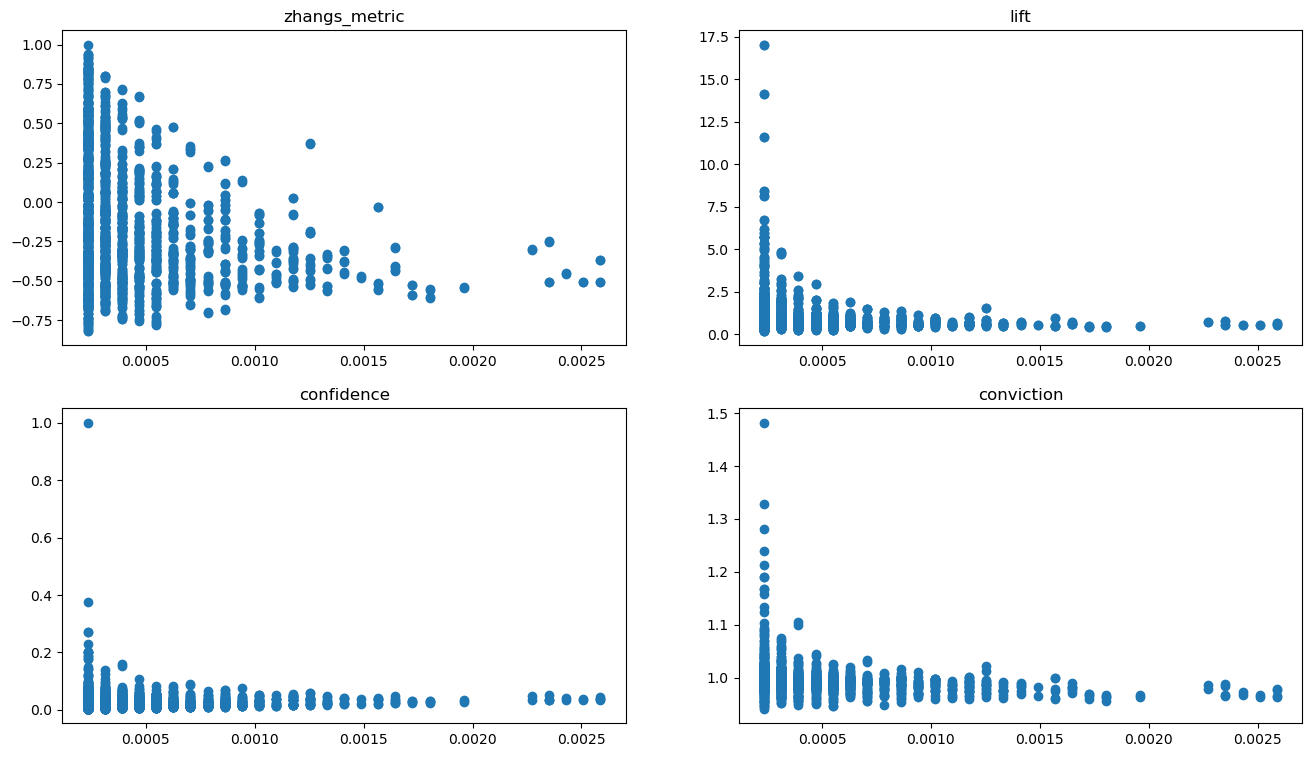

In [72]:
metrics = ['zhangs_metric','lift','confidence','conviction']
plt.figure(figsize=(16,9))
for i,j in enumerate(metrics):
    plt.subplot(2,2,i+1)
    plt.title(f'{j}')
    plt.scatter(rules['support'],rules[j])

In [78]:
rules = rules[rules['zhangs_metric']>0.5]

In [139]:
# rules[rules['zhangs_metric']<-0.5].sort_values(by='zhangs_metric', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
140,(bottled beer),(whipped/sour cream),0.027277,0.034175,0.000470,0.017241,0.504508,-0.000462,0.982770,-0.502406
1301,(napkins),(other vegetables),0.021242,0.058708,0.000627,0.029520,0.502830,-0.000620,0.969924,-0.502537
1043,(frozen vegetables),(whipped/sour cream),0.022809,0.034175,0.000392,0.017182,0.502774,-0.000388,0.982710,-0.502994
512,(canned beer),(yogurt),0.020850,0.059962,0.000627,0.030075,0.501568,-0.000623,0.969186,-0.503700
706,(coffee),(soda),0.023436,0.066625,0.000784,0.033445,0.501987,-0.000778,0.965672,-0.503942
...,...,...,...,...,...,...,...,...,...,...
1032,(shopping bags),(frozen vegetables),0.046402,0.022809,0.000235,0.005068,0.222172,-0.000823,0.982168,-0.785930
1638,(salty snack),(whole milk),0.015598,0.073679,0.000235,0.015075,0.204608,-0.000914,0.940499,-0.797938
1639,(whole milk),(salty snack),0.073679,0.015598,0.000235,0.003191,0.204608,-0.000914,0.987554,-0.807566
149,(brown bread),(bottled water),0.029315,0.042875,0.000235,0.008021,0.187088,-0.001022,0.964864,-0.817395


In [135]:
rules.sort_values(by='support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1309,(semi-finished bread),(napkins),0.007525,0.021242,0.000470,0.062500,2.942343,0.000310,1.044009,0.665140
1733,(specialty chocolate),(white bread),0.011836,0.019909,0.000470,0.039735,1.995828,0.000235,1.020646,0.504931
1732,(white bread),(specialty chocolate),0.019909,0.011836,0.000470,0.023622,1.995828,0.000235,1.012071,0.509090
564,(coffee),(chewing gum),0.023436,0.009876,0.000470,0.020067,2.031852,0.000239,1.010399,0.520026
565,(chewing gum),(coffee),0.009876,0.023436,0.000470,0.047619,2.031852,0.000239,1.025392,0.512904
...,...,...,...,...,...,...,...,...,...,...
1558,(seasonal products),(roll products ),0.005644,0.004938,0.000235,0.041667,8.437831,0.000207,1.038325,0.886489
1786,"(bottled water, soda)",(rolls/buns),0.001646,0.068976,0.000235,0.142857,2.071104,0.000122,1.086194,0.518018
1787,"(bottled water, rolls/buns)",(soda),0.001332,0.066625,0.000235,0.176471,2.648720,0.000146,1.133384,0.623290
1788,"(soda, rolls/buns)",(bottled water),0.002351,0.042875,0.000235,0.100000,2.332358,0.000134,1.063472,0.572596


In [132]:
rules[rules['antecedents'].apply(lambda x: 'rolls/buns' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1796,(rolls/buns),"(domestic eggs, fruit/vegetable juice)",0.068976,0.000862,0.000235,0.003409,3.953926,0.000176,1.002556,0.802436
1794,"(rolls/buns, fruit/vegetable juice)",(domestic eggs),0.001254,0.032685,0.000235,0.187500,5.736511,0.000194,1.190541,0.826715
1792,"(domestic eggs, rolls/buns)",(fruit/vegetable juice),0.001176,0.029707,0.000235,0.200000,6.732454,0.000200,1.212866,0.852468
1791,(rolls/buns),"(bottled water, soda)",0.068976,0.001646,0.000235,0.003409,2.071104,0.000122,1.001769,0.555481
1788,"(soda, rolls/buns)",(bottled water),0.002351,0.042875,0.000235,0.100000,2.332358,0.000134,1.063472,0.572596
1787,"(bottled water, rolls/buns)",(soda),0.001332,0.066625,0.000235,0.176471,2.648720,0.000146,1.133384,0.623290


## apriori  scenario 2
The second scenario utilizes only transactions from a 
specific time period. By reducing the dataset, we can improve the results of the Apriori 
algorithm.

Let's take the example of Walmart in 2004, which successfully applied association 
rules to predict demand when hurricanes hit Florida. In that case, Walmart only used 
transactions from around the hurricane time, and that slice of data during that period provided 
actionable insights that led Walmart to stock up on strawberry pop tarts, ultimately selling all 
of them.


The idea behind the second scenario is that customer preferences might vary during certain 
times due to specific circumstances. Slicing the data for only a certain period might capture 
patterns unique to that time. Additionally, arranging products in a store can be done regularly, 
whether monthly, quarterly, or based on events such as when a storm is predicted to hit the 
city.


Even though the time series analysis in the previous section did not reveal any notable trends, 
we will take the first quarter of 2014 as an example for the second scenario, assuming that
this analysis will be implemented for the first quarter of 2016.

In [82]:
df.head()

,index,Member_number,Date,itemDescription,transaction_id
0,6864,1249,2014-01-01,coffee,2
1,12137,1381,2014-01-01,soda,3
2,7933,1440,2014-01-01,yogurt,4
3,12334,1659,2014-01-01,frozen vegetables,5
4,9543,1789,2014-01-01,candles,6


In [83]:
dfq12014 = df[(df['Date']>='2014-01-01')&(df['Date']<'2014-04-01')]

In [84]:
dfq12014

,index,Member_number,Date,itemDescription,transaction_id
0,6864,1249,2014-01-01,coffee,2
1,12137,1381,2014-01-01,soda,3
2,7933,1440,2014-01-01,yogurt,4
3,12334,1659,2014-01-01,frozen vegetables,5
4,9543,1789,2014-01-01,candles,6
...,...,...,...,...,...
2707,5786,4274,2014-03-31,pip fruit,1894
2708,12171,4539,2014-03-31,brown bread,1895
2709,6656,4706,2014-03-31,cream cheese,1896
2710,7387,4769,2014-03-31,dessert,1897


In [85]:
dfq12014['itemDescription'].value_counts()

itemDescription
rolls/buns         128
soda               116
whole milk         103
yogurt              95
shopping bags       91
                  ... 
tea                  1
canned fruit         1
make up remover      1
baby cosmetics       1
male cosmetics       1
Name: count, Length: 143, dtype: int64

In [86]:
dfq12014['itemDescription'].value_counts().describe()

count    143.000000
mean      18.965035
std       24.958391
min        1.000000
25%        3.000000
50%       10.000000
75%       21.000000
max      128.000000
Name: count, dtype: float64

In [87]:
dfq12014_ap = dfq12014.groupby('transaction_id')['itemDescription'].apply(list).reset_index()
# use this version, not transaction id version because eda for this dataset won't investigated

In [88]:
dfq12014_ap

,transaction_id,itemDescription
0,2,[coffee]
1,3,[soda]
2,4,[yogurt]
3,5,[frozen vegetables]
4,6,[candles]
...,...,...
1891,1893,"[cat food, dental care]"
1892,1894,[pip fruit]
1893,1895,[brown bread]
1894,1896,[cream cheese ]


In [120]:
te1 = TransactionEncoder()
te_q12014 = te1.fit_transform(dfq12014_ap['itemDescription'])

In [121]:
dataq12014 = pd.DataFrame(te_q12014, columns = te1.columns_)

In [122]:
dfq12014['itemDescription'].value_counts().min()/len(dfq12014)

0.0003687315634218289

In [123]:
frq_itmsetq12014 = apriori(dataq12014, min_support=.0004, use_colnames=True)
frq_itmsetq12014.sort_values(by='support', ascending=False)

,support,itemsets
103,0.066456,(rolls/buns)
116,0.060654,(soda)
140,0.053270,(whole milk)
141,0.049578,(yogurt)
11,0.045359,(bottled water)
...,...,...
432,0.000527,"(cream cheese , rolls/buns)"
433,0.000527,"(cream cheese , shopping bags)"
434,0.000527,"(cream cheese , soda)"
435,0.000527,"(cream cheese , sparkling wine)"


In [124]:
frq_itmsetq12014['len'] = frq_itmsetq12014['itemsets'].apply(len)

In [125]:
frq_itmsetq12014.groupby('len')['support'].describe()

,count,mean,std,min,25%,50%,75%,max
len,,,,,,,,
1,143.0,0.009888,1.290597e-02,0.000527,0.001582,0.005274,0.011076,0.066456
2,718.0,0.000661,3.388050e-04,0.000527,0.000527,0.000527,0.000527,0.003165
3,117.0,0.000527,4.355462e-19,0.000527,0.000527,0.000527,0.000527,0.000527
4,2.0,0.000527,0.000000e+00,0.000527,0.000527,0.000527,0.000527,0.000527


In [126]:
# pareto
frq_itmsetq12014['support'].quantile(.50)

0.0005274261603375527

In [127]:
rulesq12014 = association_rules(frq_itmsetq12014, metric="support", min_threshold=0.00053)
rulesq12014.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
154,(rum),(long life bakery product),0.002637,0.020042,0.001055,0.400000,19.957895,0.001002,1.633263,0.952406
243,(sweet spreads),(whipped/sour cream),0.003692,0.037447,0.001055,0.285714,7.629779,0.000917,1.347574,0.872155
66,(canned fish),(other vegetables),0.004747,0.044831,0.001055,0.222222,4.956863,0.000842,1.228074,0.802067
107,(detergent),(rolls/buns),0.007911,0.066456,0.001582,0.200000,3.009524,0.001057,1.166930,0.673046
219,(white bread),(rolls/buns),0.020570,0.066456,0.003165,0.153846,2.315018,0.001798,1.103280,0.579968
...,...,...,...,...,...,...,...,...,...,...
54,(rolls/buns),(candy),0.066456,0.015823,0.001055,0.015873,1.003175,0.000003,1.000051,0.003390
121,(rolls/buns),(domestic eggs),0.066456,0.034283,0.001055,0.015873,0.463004,-0.001223,0.981293,-0.554044
212,(rolls/buns),(shopping bags),0.066456,0.044831,0.001055,0.015873,0.354062,-0.001924,0.970575,-0.661503
130,(rolls/buns),(frozen vegetables),0.066456,0.021624,0.001055,0.015873,0.734030,-0.000382,0.994156,-0.279609


In [128]:
rulesq12014.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
antecedent support,248.0,0.034953,0.017156,0.002637,0.020570,0.034283,0.045359,0.066456
consequent support,248.0,0.034953,0.017156,0.002637,0.020570,0.034283,0.045359,0.066456
support,248.0,0.001302,0.000411,0.001055,0.001055,0.001055,0.001582,0.003165
confidence,248.0,0.051030,0.041698,0.015873,0.027648,0.038462,0.062500,0.400000
lift,248.0,1.892021,2.171239,0.354062,0.777548,1.303843,2.063423,19.957895
leverage,248.0,0.000145,0.000704,-0.001924,-0.000317,0.000321,0.000643,0.001798
conviction,248.0,1.019229,0.057034,0.956039,0.992546,1.009117,1.028888,1.633263
zhangs_metric,248.0,0.185353,0.428007,-0.661503,-0.229932,0.242672,0.530563,0.969322


In [129]:
rulesq12014 = rulesq12014[rulesq12014['zhangs_metric'] > 0.5]

In [134]:
rulesq12014.sort_values(by='support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
218,(rolls/buns),(white bread),0.066456,0.020570,0.003165,0.047619,2.315018,0.001798,1.028402,0.608475
219,(white bread),(rolls/buns),0.020570,0.066456,0.003165,0.153846,2.315018,0.001798,1.103280,0.579968
178,(napkins),(pastry),0.023734,0.034283,0.002110,0.088889,2.592821,0.001296,1.059934,0.629254
179,(pastry),(napkins),0.034283,0.023734,0.002110,0.061538,2.592821,0.001296,1.040283,0.636128
59,(candy),(yogurt),0.015823,0.049578,0.002110,0.133333,2.689362,0.001325,1.096641,0.638264
...,...,...,...,...,...,...,...,...,...,...
108,(detergent),(yogurt),0.007911,0.049578,0.001055,0.133333,2.689362,0.000663,1.096641,0.633174
69,(fruit/vegetable juice),(cat food),0.035338,0.014241,0.001055,0.029851,2.096186,0.000552,1.016091,0.542100
2,(UHT-milk),(long life bakery product),0.010021,0.020042,0.001055,0.105263,5.252078,0.000854,1.095247,0.817794
3,(long life bakery product),(UHT-milk),0.020042,0.010021,0.001055,0.052632,5.252078,0.000854,1.044978,0.826157


In [133]:
rulesq12014[rulesq12014['antecedents'].apply(lambda x: 'rolls/buns' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
218,(rolls/buns),(white bread),0.066456,0.020570,0.003165,0.047619,2.315018,0.001798,1.028402,0.608475
106,(rolls/buns),(detergent),0.066456,0.007911,0.001582,0.023810,3.009524,0.001057,1.016286,0.715254


# interpretation

In interpreting the results, we will focus on the Zhang's metric. The highest Zhang's metric 
indicates a high positive correlation within rules, while a negative Zhang's metric indicates a 
high negative correlation.

In terms of product placement, products need to be grouped into certain categories first, such 
as bread products, drink products, and hygiene products, because sellers can't just place 
rolls/buns beside detergent. However, if those two items have a higher Zhang's metric, we can 
take advantage of it by implementing cross-selling strategies, such as offering rolls/buns at a 
discounted price to customers who buy detergent. Additionally, targeted marketing can be 
employed by promoting new rolls/buns to customers who buy detergent.

When comparing the results of the first and second scenarios, we can observe from Figures 
39 and 42, which depict the rules for rolls/buns, that the rules differ. This suggests that
customer preferences may vary at different times. Scenario two also displays data with the 
highest support, aiding in choosing the minimum support. Other evaluation metrics may show 
good indicators, but when the support is small, it implies that the case occurred only a few 
times. Therefore, reducing the dataset can lead to more reliable results. In this work, the
writer suggests that association rules be generated regularly, either monthly, quarterly, or 
based on events, as customer behavior is always changing